In this project I'm going to create a lot of visualizations in an effort to gain some insight to the trends of my collegiate running career. I improved significantly throughout my time in college (nearly 2 mins came off of my 5k PR from my freshman to senior year), and I want to see the big picture here. What measurable things about my running changed over that time frame?

In [1]:
import pandas as pd

df = pd.read_csv("Running_Data_Clean.csv")

In [2]:
df

,Unnamed: 0,Date,Title,Avg Pace,Best Pace,Distance,Calories,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Total Ascent,Total Descent,Avg Stride Length,Min Elevation,Max Elevation,Total Run Time,Min Temp,Max Temp
0,0,2017-12-31,Sevierville Running,6.566667,5.983333,13.62,1462.0,179.348833,175.102791,175.0,187.0,381.0,425.0,1.40,958.0,1181.0,89.516667,22.0,46.0
1,1,2017-12-30,Sevierville Running,7.100000,6.533333,5.83,631.0,151.453714,169.677584,176.0,191.0,169.0,9.0,1.29,1001.0,1174.0,41.383333,27.0,49.0
2,2,2017-12-29,Sevierville Running,6.166667,5.350000,8.22,881.0,163.870123,174.252760,176.0,191.0,285.0,184.0,1.47,968.0,1167.0,50.750000,28.0,44.0
3,3,2017-12-29,Sevierville Running,6.950000,6.316667,1.97,209.0,139.974450,165.737706,174.0,191.0,48.0,181.0,1.34,1028.0,1178.0,13.700000,28.0,44.0
4,4,2017-12-28,Moss Point Running,7.066667,6.383333,7.37,797.0,156.137539,170.186633,173.0,185.0,182.0,195.0,1.32,64.0,135.0,52.066667,25.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,1878,2022-01-05,Starkville Running,6.950000,6.316667,11.50,1014.0,147.000000,163.000000,178.0,201.0,420.0,404.0,1.30,223.0,402.0,79.966667,33.0,55.0
1879,1879,2022-01-04,Noxubee County Running,6.166667,4.483333,11.01,851.0,145.000000,169.000000,183.0,232.0,289.0,246.0,1.42,130.0,201.0,67.800000,30.0,40.5
1880,1880,2022-01-03,Starkville Running,6.866667,5.650000,15.01,1349.0,148.000000,171.000000,179.0,190.0,807.0,774.0,1.31,89.0,243.0,103.116667,29.5,51.0
1881,1881,2022-01-02,Leon County Running,7.050000,5.716667,8.01,688.0,141.000000,156.000000,177.0,188.0,810.0,978.0,1.29,-94.0,167.0,56.416667,30.0,65.0


In [3]:
df['Date'] = pd.to_datetime(pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         1883 non-null   int64         
 1   Date               1883 non-null   datetime64[ns]
 2   Title              1883 non-null   object        
 3   Avg Pace           1883 non-null   float64       
 4   Best Pace          1883 non-null   float64       
 5   Distance           1883 non-null   float64       
 6   Calories           1883 non-null   float64       
 7   Avg HR             1883 non-null   float64       
 8   Max HR             1883 non-null   float64       
 9   Avg Run Cadence    1883 non-null   float64       
 10  Max Run Cadence    1883 non-null   float64       
 11  Total Ascent       1883 non-null   float64       
 12  Total Descent      1883 non-null   float64       
 13  Avg Stride Length  1883 non-null   float64       
 14  Min Elev

In [4]:
import seaborn as sns

## Where did most of my runs occur?

Wordlcloud

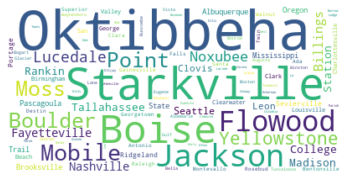

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = " ".join(list(df['Title']))
text = text.replace("Running", '')
text = text.replace("County", '')

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'Title', 'Avg Pace', 'Best Pace', 'Distance',
       'Calories', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence',
       'Total Ascent', 'Total Descent', 'Avg Stride Length', 'Min Elevation',
       'Max Elevation', 'Total Run Time', 'Min Temp', 'Max Temp'],
      dtype='object')

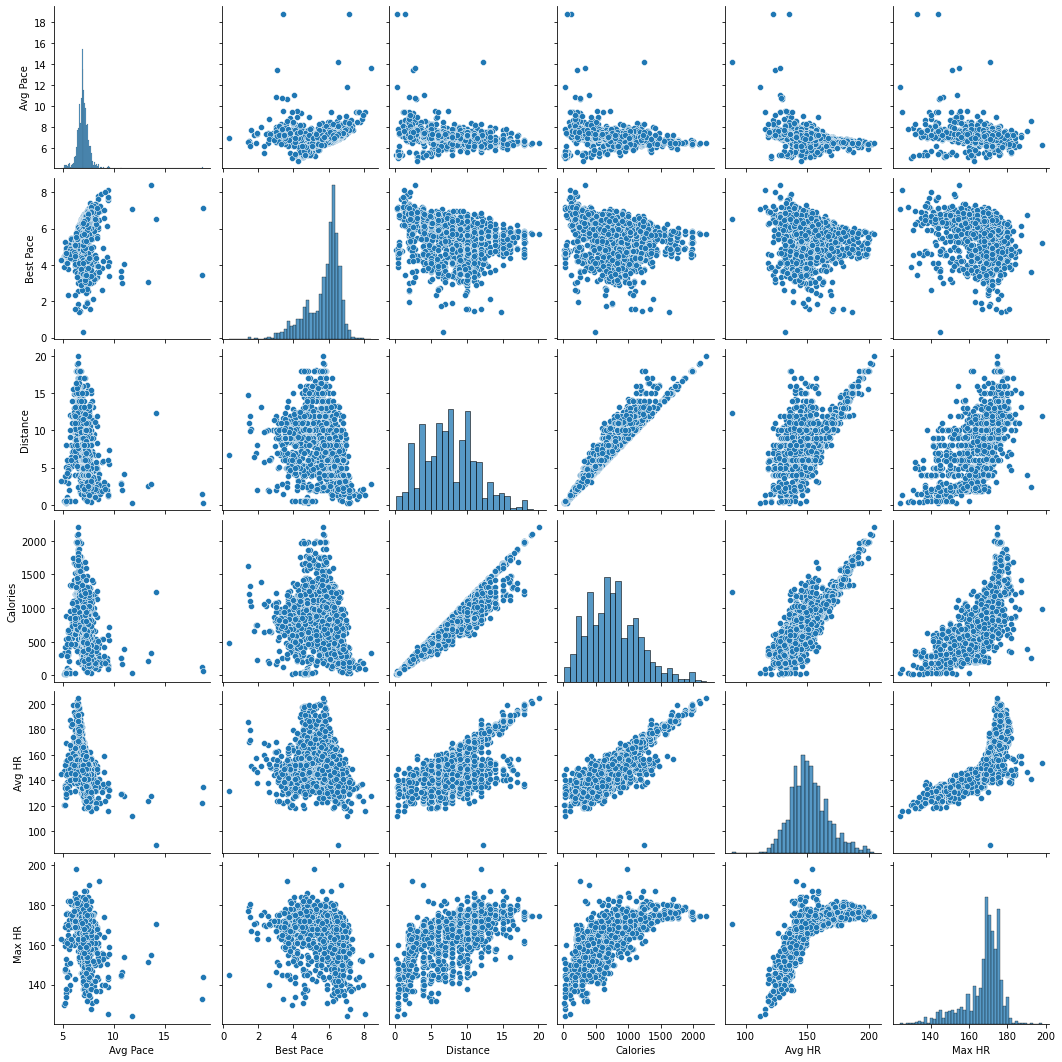

In [8]:
sns.pairplot(df[['Avg Pace', 'Best Pace', 'Distance',
       'Calories', 'Avg HR', 'Max HR']])

## Mileage

<AxesSubplot:xlabel='Distance', ylabel='Count'>

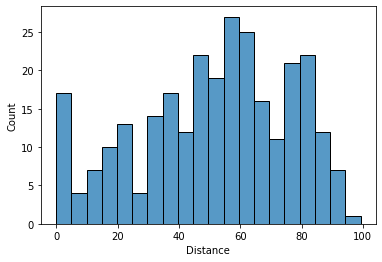

In [9]:
sns.histplot(data= pd.DataFrame(df.resample('W', on='Date')['Distance'].sum()), x = 'Distance', bins = 20)

<AxesSubplot:xlabel='Date', ylabel='Distance'>

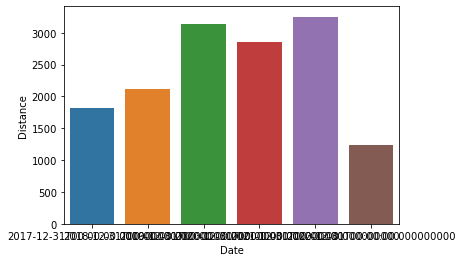

In [10]:
sns.barplot(data= pd.DataFrame(df.resample('y', on='Date')['Distance'].sum()).reset_index(), x = 'Date', y = 'Distance')

## Speed

Is it the case that I running faster day to day was correlated with faster race times?

<AxesSubplot:xlabel='Date', ylabel='Avg Pace'>

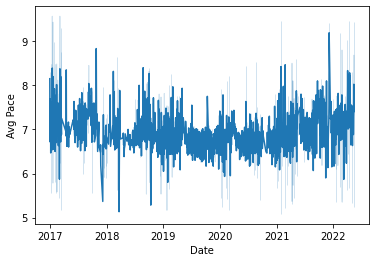

In [11]:
sns.lineplot(data = df[df["Avg Pace"] < 10], x = 'Date', y = 'Avg Pace')

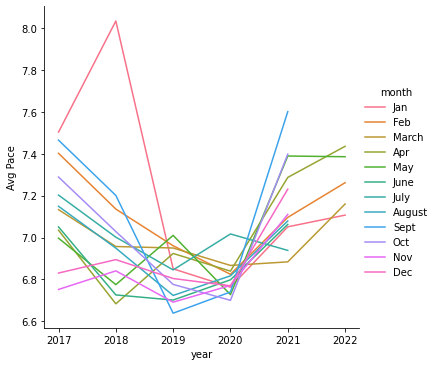

In [15]:
df['month'] = [x.month for x in df['Date']]
df['year'] = [x.year for x in df['Date']]

month_df = pd.DataFrame(df.resample('m', on='Date')['Avg Pace'].mean()).reset_index()
month_df['month'] = [x.month for x in month_df['Date']]
month_df['year'] = [x.year for x in month_df['Date']]

m = {1:'Jan', 2:'Feb', 3:'March', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Sept', 10:'Oct', 11:'Nov' , 12:'Dec'}
month_df['month'] = [m[x] for x in month_df['month']]

sns.relplot(data=month_df, x="year", y="Avg Pace", hue="month", kind="line")

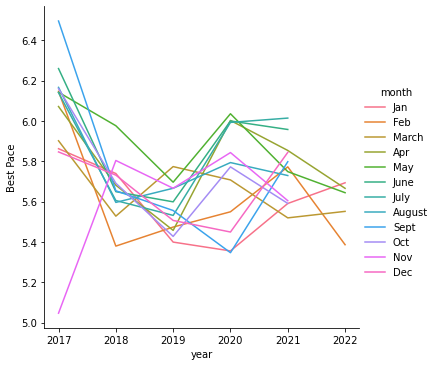

In [17]:
month_df = pd.DataFrame(df.resample('m', on='Date')['Best Pace'].mean()).reset_index()
month_df['month'] = [x.month for x in month_df['Date']]
month_df['year'] = [x.year for x in month_df['Date']]

m = {1:'Jan', 2:'Feb', 3:'March', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Sept', 10:'Oct', 11:'Nov' , 12:'Dec'}
month_df['month'] = [m[x] for x in month_df['month']]

sns.relplot(data=month_df, x="year", y="Best Pace", hue="month", kind="line")

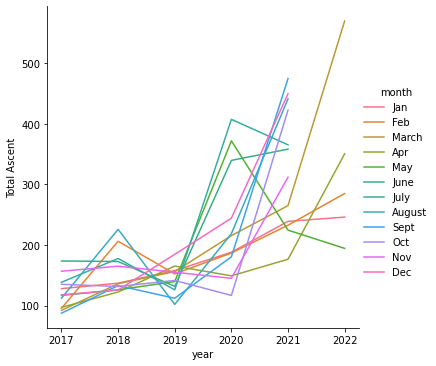

In [16]:
month_df = pd.DataFrame(df.resample('m', on='Date')['Total Ascent'].mean()).reset_index()
month_df['month'] = [x.month for x in month_df['Date']]
month_df['year'] = [x.year for x in month_df['Date']]

m = {1:'Jan', 2:'Feb', 3:'March', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Sept', 10:'Oct', 11:'Nov' , 12:'Dec'}
month_df['month'] = [m[x] for x in month_df['month']]

sns.relplot(data=month_df, x="year", y="Total Ascent", hue="month", kind="line")

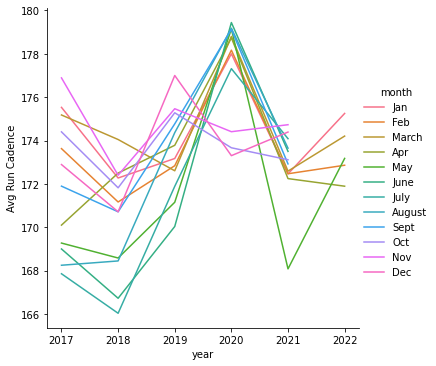

In [18]:
month_df = pd.DataFrame(df.resample('m', on='Date')['Avg Run Cadence'].mean()).reset_index()
month_df['month'] = [x.month for x in month_df['Date']]
month_df['year'] = [x.year for x in month_df['Date']]

m = {1:'Jan', 2:'Feb', 3:'March', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Sept', 10:'Oct', 11:'Nov' , 12:'Dec'}
month_df['month'] = [m[x] for x in month_df['month']]

sns.relplot(data=month_df, x="year", y="Avg Run Cadence", hue="month", kind="line")

<AxesSubplot:xlabel='Date', ylabel='Avg Pace'>

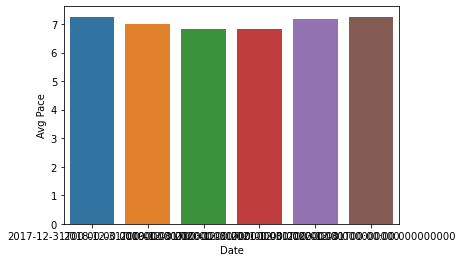

In [13]:
sns.barplot(data = pd.DataFrame(df.resample('y', on='Date')['Avg Pace'].mean()).reset_index(), x = 'Date', y = 'Avg Pace')

In [14]:
sns.__version__

'0.11.1'

## Fitness

In [ ]:
sns.regplot(data = df[df["Avg Pace"] < 10], x = 'Avg Pace', y = 'Avg HR')

In [ ]:
sns.regplot(data = df[df["Best Pace"] < 10], x = 'Best Pace', y = 'Max HR')

In [ ]:
sns.lineplot(data = df, x = 'Date', y = 'Avg HR')